# Yelp Data Challenge - Data Preprocessing

BitTiger DS501

Jun 2017

## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.
    Take a look at some examples to get you started: https://github.com/Yelp/dataset-examples.



## Read data from file and load to Pandas DataFrame

**Warning**: Loading all the 1.8 GB data into Pandas at a time takes long time and a lot of memory!

In [1]:
import json
import pandas as pd

In [7]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'data/business.json',
    'data/checkin.json',
    'data/review.json',
    'data/tip.json',
    'data/user.json'
]

#### Business Data

In [3]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [4]:
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,691 Richmond Rd,"{'RestaurantsPriceRange2': 2, 'BusinessParking...",YDf95gJZaq05wvo7hTQbbQ,"[Shopping, Shopping Centers]",Richmond Heights,"{'Monday': '10:00-21:00', 'Tuesday': '10:00-21...",1,41.541716,-81.493116,Richmond Town Square,,44143,17,2.0,OH
1,2824 Milton Rd,"{'GoodForMeal': {'dessert': False, 'latenight'...",mLwM-h2YhXl2NCgdS84_Bw,"[Food, Soul Food, Convenience Stores, Restaura...",Charlotte,"{'Monday': '10:00-22:00', 'Tuesday': '10:00-22...",0,35.236870,-80.741976,South Florida Style Chicken & Ribs,Eastland,28215,4,4.5,NC


In [5]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156639 entries, 0 to 156638
Data columns (total 15 columns):
address         156639 non-null object
attributes      156639 non-null object
business_id     156639 non-null object
categories      156639 non-null object
city            156639 non-null object
hours           156639 non-null object
is_open         156639 non-null int64
latitude        156638 non-null float64
longitude       156638 non-null float64
name            156639 non-null object
neighborhood    156639 non-null object
postal_code     156639 non-null object
review_count    156639 non-null int64
stars           156639 non-null float64
state           156639 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 17.9+ MB


#### Checkin Data

In [8]:
with open(file_checkin) as f:
    df_checkin = pd.DataFrame(json.loads(line) for line in f)
df_checkin.head(2)

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Thursday': {'21:00': 4, '1:00': 1, '4:00': 1..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Monday': {'13:00': 1}, 'Thursday': {'20:00':..."


In [14]:
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135148 entries, 0 to 135147
Data columns (total 2 columns):
business_id    135148 non-null object
time           135148 non-null object
dtypes: object(2)
memory usage: 2.1+ MB


#### Review Data

In [10]:
with open(file_review, encoding='utf-8') as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA


In [15]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4736897 entries, 0 to 4736896
Data columns (total 9 columns):
business_id    object
cool           int64
date           object
funny          int64
review_id      object
stars          int64
text           object
useful         int64
user_id        object
dtypes: int64(4), object(5)
memory usage: 325.3+ MB


#### Tip Data

In [11]:
with open(file_tip, encoding='utf-8') as f:
    df_tip = pd.DataFrame(json.loads(line) for line in f)
df_tip.head(2)

,business_id,date,likes,text,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,ZcLKXikTHYOnYt5VYRO5sg


In [16]:
df_tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028802 entries, 0 to 1028801
Data columns (total 5 columns):
business_id    1028802 non-null object
date           1028802 non-null object
likes          1028802 non-null int64
text           1028802 non-null object
user_id        1028802 non-null object
dtypes: int64(1), object(4)
memory usage: 39.2+ MB


#### User Data

In [12]:
with open(file_user) as f:
    df_user = pd.DataFrame(json.loads(line) for line in f)
df_user.head(2)

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,3.80,5174,284,5174,5175,78,299,1435,7829,7397,...,16856,"[2014, 2016, 2013, 2011, 2012, 2015, 2010, 2017]",209,"[M19NwFwAXKRZzt8koF11hQ, QRcMZ8pJJBBZaKubHOoMD...",16605,Cin,272,17019,lsSiIjAKVl-QRxKjRErBeg,2010-07-13
1,3.94,1556,211,1556,1285,101,134,1295,162,2134,...,40110,"[2014, 2017, 2011, 2012, 2015, 2009, 2013, 200...",835,"[eoSSJzdprj3jxXyi94vDXg, QF0urZa-0bxga17ZeY-9l...",10882,Andrea,2559,83681,om5ZiponkpRqUNa3pVPiRg,2006-01-18


In [17]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183362 entries, 0 to 1183361
Data columns (total 22 columns):
average_stars         1183362 non-null float64
compliment_cool       1183362 non-null int64
compliment_cute       1183362 non-null int64
compliment_funny      1183362 non-null int64
compliment_hot        1183362 non-null int64
compliment_list       1183362 non-null int64
compliment_more       1183362 non-null int64
compliment_note       1183362 non-null int64
compliment_photos     1183362 non-null int64
compliment_plain      1183362 non-null int64
compliment_profile    1183362 non-null int64
compliment_writer     1183362 non-null int64
cool                  1183362 non-null int64
elite                 1183362 non-null object
fans                  1183362 non-null int64
friends               1183362 non-null object
funny                 1183362 non-null int64
name                  1183362 non-null object
review_count          1183362 non-null int64
useful                11833

## Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category (You may need to filter null categories first)

In [109]:
# Create Pandas DataFrame filters
df_business_LV= df_business[df_business.city=='Las Vegas']
df_business_LV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24768 entries, 10 to 156635
Data columns (total 15 columns):
address         24768 non-null object
attributes      24768 non-null object
business_id     24768 non-null object
categories      24768 non-null object
city            24768 non-null object
hours           24768 non-null object
is_open         24768 non-null int64
latitude        24768 non-null float64
longitude       24768 non-null float64
name            24768 non-null object
neighborhood    24768 non-null object
postal_code     24768 non-null object
review_count    24768 non-null int64
stars           24768 non-null float64
state           24768 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 3.0+ MB


In [130]:
# Create filtered DataFrame, and name it df_filtered
df_business_LV = df_business_LV[df_business_LV.categories.notnull()]
df_filtered = df_business_LV[df_business_LV["categories"].apply(str).str.contains("Restaurants")]

In [131]:
df_filtered.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
58,2400 E Lake Mead Blvd,"{'RestaurantsTableService': True, 'GoodForMeal...",LDMCrFlGIFUN6L-FEFgzWg,"[Restaurants, American (Traditional), Mexican,...",Las Vegas,"{'Monday': '9:00-23:00', 'Tuesday': '9:00-23:0...",1,36.196203,-115.116799,El Pollo Loco,,89030,12,3.0,NV
64,4190 S Rainbow Blvd,"{'RestaurantsPriceRange2': 1, 'RestaurantsAtti...",QTH_XGh4rWYdd0fTW-tUDw,"[Mexican, Restaurants]",Las Vegas,{},0,36.112519,-115.242605,Baja Fresh Mexican Grill,Spring Valley,89103,7,3.5,NV
90,6325 E Russell Rd,"{'BusinessAcceptsCreditCards': True, 'Restaura...",DiA78qPtp6rfRNdomzjBbw,"[Chinese, Food, Convenience Stores, Restaurants]",Las Vegas,{},1,36.083384,-115.033995,Joshan Filipino Oriental Market,Southeast,89122,17,3.5,NV
107,"1203 E Charleston Blvd, Ste 140","{'RestaurantsTableService': True, 'GoodForMeal...",YTqtM2WFhcMZGeAGA08Cfg,"[Seafood, Restaurants, Specialty Food, Ethnic ...",Las Vegas,"{'Monday': '10:30-21:00', 'Tuesday': '10:30-21...",1,36.159363,-115.135949,Mariscos Playa Escondida,Downtown,89104,330,4.5,NV
116,"South Point Hotel & Casino, 9777 S Las Vegas Blvd","{'RestaurantsTableService': True, 'GoodForMeal...",Oto60yDwk1z72WmfWEYrjg,"[Food, Restaurants, Mexican]",Las Vegas,"{'Sunday': '11:00-23:00', 'Wednesday': '10:00-...",1,36.012191,-115.173993,Baja Miguel's,Southeast,89183,175,3.0,NV


#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [132]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [133]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

In [134]:
df_selected_business.head()

,business_id,name,categories,stars
58,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"[Restaurants, American (Traditional), Mexican,...",3.0
64,QTH_XGh4rWYdd0fTW-tUDw,Baja Fresh Mexican Grill,"[Mexican, Restaurants]",3.5
90,DiA78qPtp6rfRNdomzjBbw,Joshan Filipino Oriental Market,"[Chinese, Food, Convenience Stores, Restaurants]",3.5
107,YTqtM2WFhcMZGeAGA08Cfg,Mariscos Playa Escondida,"[Seafood, Restaurants, Specialty Food, Ethnic ...",4.5
116,Oto60yDwk1z72WmfWEYrjg,Baja Miguel's,"[Food, Restaurants, Mexican]",3.0


In [136]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business = df_selected_business.rename(columns={'stars':'avg_stars'})

In [ ]:
# Inspect your DataFrame
pass

#### Save results to csv files

In [139]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv('data/selected_business.csv', index=False)

In [141]:
# Try reload the csv file to check if everything works fine
df_selected_business = pd.read_csv('data/selected_business.csv', encoding ='ISO-8859-1')

In [142]:
df_selected_business.head()

,business_id,name,categories,avg_stars
0,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"['Restaurants', 'American (Traditional)', 'Mex...",3.0
1,QTH_XGh4rWYdd0fTW-tUDw,Baja Fresh Mexican Grill,"['Mexican', 'Restaurants']",3.5
2,DiA78qPtp6rfRNdomzjBbw,Joshan Filipino Oriental Market,"['Chinese', 'Food', 'Convenience Stores', 'Res...",3.5
3,YTqtM2WFhcMZGeAGA08Cfg,Mariscos Playa Escondida,"['Seafood', 'Restaurants', 'Specialty Food', '...",4.5
4,Oto60yDwk1z72WmfWEYrjg,Baja Miguel's,"['Food', 'Restaurants', 'Mexican']",3.0


In [145]:
df_selected_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 4 columns):
business_id    5682 non-null object
name           5682 non-null object
categories     5682 non-null object
avg_stars      5682 non-null float64
dtypes: float64(1), object(3)
memory usage: 177.6+ KB


### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [ ]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

#### Prepare dataframes to be joined, - on business_id

In [146]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')

In [147]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_selected_business.set_index('business_id')

#### Join! and reset index

In [148]:
# Join df_left and df_right. What type of join?
df_new = pd.merge(df_selected_business, df_review, on='business_id', how='inner')

In [149]:
# You may want to reset the index 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849883 entries, 0 to 849882
Data columns (total 12 columns):
business_id    849883 non-null object
name           849883 non-null object
categories     849883 non-null object
avg_stars      849883 non-null float64
cool           849883 non-null int64
date           849883 non-null object
funny          849883 non-null int64
review_id      849883 non-null object
stars          849883 non-null int64
text           849883 non-null object
useful         849883 non-null int64
user_id        849883 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 84.3+ MB


#### We further filter data by date, e.g. keep comments from last 2 years

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [150]:
# Make a filter that selects date after 2015-01-20
cond_last_years = df_new['date'] > u'2015-01-20'

In [151]:
# Filter the joined DataFrame and name it as df_final
df_final = df_new[cond_last_years]

In [152]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437524 entries, 1 to 849845
Data columns (total 12 columns):
business_id    437524 non-null object
name           437524 non-null object
categories     437524 non-null object
avg_stars      437524 non-null float64
cool           437524 non-null int64
date           437524 non-null object
funny          437524 non-null int64
review_id      437524 non-null object
stars          437524 non-null int64
text           437524 non-null object
useful         437524 non-null int64
user_id        437524 non-null object
dtypes: float64(1), int64(4), object(7)
memory usage: 43.4+ MB


In [154]:
df_final.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
1,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"['Restaurants', 'American (Traditional)', 'Mex...",3.0,0,2015-06-26,0,4gH-5f0ewrH2Vvl0UYtQQA,1,I'm at training for work and went for a quick ...,0,GLGz9sSNHIbguwv90XStYA
3,LDMCrFlGIFUN6L-FEFgzWg,El Pollo Loco,"['Restaurants', 'American (Traditional)', 'Mex...",3.0,2,2015-06-18,1,qlnMpBo8_GWhlJE6zR51qA,3,Given this location is close to my work I find...,2,YxqLJwDgcL4OoDB1hN-Ikg


#### Take a glance at the final dataset

* Do more EDA here as you like!

In [153]:
import matplotlib.pyplot as plt

% matplotlib inline

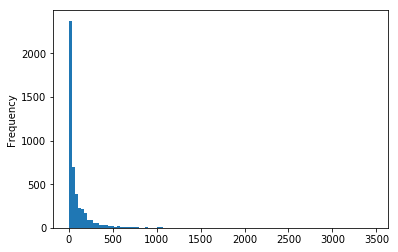

In [155]:
# e.g. calculate counts of reviews per business entity, and plot it
df_final["business_id"].value_counts().plot.hist(bins = 100)
plt.show()

## Save your preprocessed dataset to csv file

* Respect your laptop's hard work! You don't want to make it run everything again.

In [157]:
# Save to ./data/last_2_years_restaurant_reviews.csv for your next task
df_final.to_csv('data/last_3_years_restaurant_reviews.csv', index=False, encoding='utf-8')